### **3.4 Exercício 4 - Mercado Bitcoin (Escopo aberto)**

<p align="center">
  <img 
    src   = "https://cdn-icons-png.flaticon.com/512/1797/1797330.png" 
    style = "
      border: 0px solid rgba(0, 0, 0, 0.1);
      border-radius: 25px; 
      width: 10%;
      height: 10%;
    "
  />
</p>

Capture e armazene os dados do Mercado Bitcoin, seguindo os seguintes requisitos:
* 1. Crie uma função, que implemente compressão de listas para extrair dados de ao menos 3 criptomoedas;
* 2. Crie uma função, que aplique alguma estrutura (alguma limpeza) sobre os dados capturados e os armazene dentro de um arquivo (.csv, .txt, etc.); e
* 3. Crie uma estratégia que te permita extrair os dados ao menos 5 vezes, durante um  período de tempo regularmente espaçado (1 extração por segundo, 1 extração por minuto, etc.);

Consulte o link da documentação do Mercado Bitcoin [aqui](https://www.mercadobitcoin.com.br/api-doc/) e [aqui](https://www.mercadobitcoin.com.br/trade-api/).

In [7]:
import requests
import datetime 
import unicodedata
import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [10]:
# Baixando o arquivo Excel
data = pd.ExcelFile("teste.xlsx")

df_teste = pd.read_excel(data,header=None)
df_teste.columns = ['Bitcoin']

In [11]:
df_teste.head(10)

,Bitcoin
0,AAVE : Aave
1,ABFY : Ambify
2,ACH : Alchemy Pay
3,ACMFT : AC Milan
4,ACORDO01 : None
5,ADA : Cardano
6,ADS : Adshares
7,AGIX : SingularityNET
8,AIOZ : Aioz
9,ALCX : Alchemix


In [12]:
df_teste.shape

(318, 1)

In [14]:
# Criando uma lista para separar por chave : valor
lista_teste= [i.split(': ') for i in df_teste['Bitcoin']]


In [15]:
for i in range(10):
    print(f'{i} : {lista_teste[i]}')

0 : ['AAVE\xa0', 'Aave']
1 : ['ABFY\xa0', 'Ambify']
2 : ['ACH\xa0', 'Alchemy Pay']
3 : ['ACMFT\xa0', 'AC Milan']
4 : ['ACORDO01\xa0', 'None']
5 : ['ADA\xa0', 'Cardano']
6 : ['ADS\xa0', 'Adshares']
7 : ['AGIX\xa0', 'SingularityNET']
8 : ['AIOZ\xa0', 'Aioz']
9 : ['ALCX\xa0', 'Alchemix']


In [31]:
# processo para alocar os elementos em listas separadas e corrigir formatação

lista1=[]
lista2=[]   
for i in range(len(lista_teste)):
    str_normalized = unicodedata.normalize("NFKD", lista_teste[i][0])
    lista1.append(str_normalized.strip())
    str_normalized = unicodedata.normalize("NFKD", lista_teste[i][1])
    lista2.append(str_normalized.strip())


In [32]:
dict_cripto = dict(zip(lista1,lista2))

In [ ]:
dict_cripto

In [33]:
def cripto_aleatoria():
    return random.choice(list(dict_cripto.keys()))

def consultar_cripto(cripto: str)->str:
    while cripto.upper() not in dict_cripto:
        cripto = input('ERRO! Critptomoeada não encontrada, digite novamente! :')
    return dict_cripto[cripto.upper()]


In [27]:
cripto_aleatoria()

'REN'

In [41]:
consultar_cripto(cripto_aleatoria())

'Surui Riqueza e Autenticidade'

In [44]:
teste = requests.get(f'https://www.mercadobitcoin.net/api/BTC/ticker/').json()
teste

{'ticker': {'high': '90356.23000627',
  'low': '87632.65000000',
  'vol': '19.3579337',
  'last': '87934.56787898',
  'buy': '87946.02488281',
  'sell': '88029.42137767',
  'open': '90200.20005000',
  'date': 1668992010}}

In [45]:
def gerar_df_cripto(x : int=1, y: int=1):
    '''
    Cria um DataFrame com 'x' número de criptomeadas geradas aleatoriamente
    extraindo os dados em intervalos 'y' segundos da API do Mercado Bitcoin
    x: int 
    y: int
    '''
    cripto_ticker={}
    for i in range(x):
        cripto = cripto_aleatoria()                                                          # gerando cripto aleatória
        teste = requests.get(f'https://www.mercadobitcoin.net/api/{cripto}/ticker/').json()  # acessando a API para extrair os dados
        teste[cripto] = teste.pop('ticker')                                                  # Renomeando o Título da Criptomoeada (original="ticker")
        cripto_ticker.update(teste)                                                          # Juntando os dados gerados em um único dicionário
        time.sleep(y)                                                                        # delay de "y" segundo para cada iteração
    df_cripto = pd.DataFrame(cripto_ticker)                                                  # transformando dict em DataFrame
    df_cripto = df_cripto.transpose()                                                        # invertendo linhaXcoluna
    df_cripto['date'] = df_cripto['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))# transformando "Era Unix" em Data-Time
    return df_cripto

In [46]:
df_exemple = gerar_df_cripto(x=5,y=3)

In [47]:
df_exemple.head(11)

,high,low,vol,last,buy,sell,open,date
NFT16,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,2022-11-20 21:53:34
MBFP09,0.00000000,0.00000000,0,104.02207000,104.02207,0,0.00000000,2022-10-24 18:18:22
MBFP02,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,2022-11-20 21:53:41
RNDR,2.64990000,2.35770000,768.63921883,2.35770000,2.30006,2.35777,2.47962000,2022-11-20 21:53:43
NFT30,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,2022-11-20 21:53:48


In [48]:
def cripto_ticker(cripto: str):
    """
    Função para mostrar informação Ticker da Cripto em um DataFrame
    cripto: str
    """
    while cripto.upper() not in dict_cripto:
        cripto = input('ERRO! Critptomoeada não encontrada, digite novamente! :')
    teste = requests.get(f'https://www.mercadobitcoin.net/api/{cripto}/ticker/').json()
    teste[cripto] = teste.pop('ticker')                                          
    df_cripto = pd.DataFrame(teste)
    df_cripto.iloc[1] = df_cripto.iloc[1].apply(lambda x: datetime.datetime.fromtimestamp(x))                                                         
    return df_cripto

In [50]:
a = cripto_ticker(cripto_aleatoria())
a.head(10)

,ILV
buy,226.97489
date,2022-11-20 21:54:07
high,244.70000000
last,239.99999000
low,221.00001000
open,244.70000000
sell,239.99933
vol,5.1856849


In [51]:
teste = requests.get('https://www.mercadobitcoin.net/api/BTC/day-summary/2013/6/20/').json()
teste

{'date': '2013-06-20',
 'opening': 262.99999,
 'closing': 269,
 'lowest': 260.00002,
 'highest': 269,
 'volume': '7253.13363567',
 'quantity': '27.11390588',
 'amount': 28,
 'avg_price': 267.50604165}

In [52]:
def cripto_sumary(cripto: str,
                  year1: int,
                  month1: int,
                  day1: int,
                  year2: int,
                  month2: int,
                  day2: int):
    """    
    Função destinada a receber uma 'Cripto' e duas datas no formato: (ano, mês, dia)   
    para devolver um DataFrame contendo as informações diárias entre essas duas datas    
    """
    
    data_inicio = datetime.date(year1, month1, day1)   # transformando entrada da data inicial em datetime
    data_fim = datetime.date(year2, month2, day2)      # transformando entrada da data final em datetime
    delta = data_fim - data_inicio                     # obtendo a diferança entre as duas

    lista_datas = []
    for i in range(delta.days + 1):                    # laço para criar uma lista com TODAS as datas
        day = data_inicio + datetime.timedelta(days=i) # .timedelta() é usado para calcular diferenças de datas
        lista_datas.append(day)                        # lista que contém todas as datas em formato DateTime
    
                                                       #Usando compressão de lista para transformar a lista anterior em string
    lista_datas_str = [datetime.datetime.strftime(date, format="%Y/%m/%d") for date in lista_datas]
    
                                                        # laço que gera uma lista com todas as informações de cada dia da cripto
    cripto_list=[]
    for i in range(len(lista_datas_str)):               # percorrendo todos os dias
        y=lista_datas_str[i][0:4]                       # pegando apenas o ano
        m=lista_datas_str[i][5:7].lstrip('0')           # pegando o mês (sem o zero a esquerda)
        d=lista_datas_str[i][8:10].lstrip('0')          # pegando o dia (sem o zero a esqueda)
        
                                                        # iteração para pegar a informação na API do Mercado Bitcoin
        teste = requests.get(f'https://www.mercadobitcoin.net/api/{cripto}/day-summary/{y}/{m}/{d}').json()                                                   
        
        cripto_list.append(teste)                       # salvando cada dia na lista fixa Cripto_list
        time.sleep(0)                                   # seprando intervalos de (n) segundos a cada iteração
        
    df_cripto = pd.DataFrame(cripto_list)               # transformando a lista em DataFrame
    df_cripto = df_cripto.set_index('date')             # usando a coluna 'date' como Index
    
    return df_cripto                                    # retorna o DataFrame


In [53]:
df_sumary_cripto = cripto_sumary('ETH',2022,1,1,2022,10,1)

In [54]:
df_sumary_cripto.head(10)

,opening,closing,lowest,highest,volume,quantity,amount,avg_price
date,,,,,,,,
2022-01-01,21019.97995,21166.59756,20737.07006,21290.00000,1441656.57500475,68.38304949,1301,21082.074955
2022-01-02,21166.59756,21449.92800,21021.63000,21706.20000,1788069.07393184,83.55810655,1673,21399.109527
2022-01-03,21457.64722,21245.44999,20992.85121,21800.00002,4720078.33643387,220.08398937,3181,21446.713820
2022-01-04,21245.45000,21664.85768,21190.91920,22063.52129,4167681.40685593,191.12466246,3503,21806.089037
2022-01-05,21664.85768,20175.94007,19800.00000,21892.79975,8707122.62946335,418.05132714,4934,20827.879411
2022-01-06,20176.71425,19362.71787,19000.00000,20224.58617,8652237.03232752,441.58294730,5942,19593.684686
2022-01-07,19362.71000,18231.50999,17502.20000,19362.71005,11941370.26421321,655.30169048,6612,18222.706332
2022-01-08,18231.50994,17899.99999,17080.00001,18480.39997,5606956.34564135,317.79196985,3587,17643.480256
2022-01-09,17899.99999,17949.99999,17567.70001,18399.00000,3320661.94315212,184.30264332,2526,18017.440680


In [55]:
df_sumary_cripto.shape

(274, 8)

In [56]:
import cufflinks as cf
cf.set_config_file(offline=True)

In [57]:
def plot_candle (dataframe):
    """
    Função para plotar gráfico de velas de um DataFrame gerado a partir da função cripto_sumary()
    """
    df_teste = dataframe[['opening','highest','lowest','closing']]             # seleciona apenas a colunas desejadas para análise
    df_teste.columns = ['open','high','low','close']                           # renomeia para compatibilizar com a função "candle" do Iplot
    return df_teste.iplot(kind='candle', title = 'Oscilação diária da Cripto') # aplica a função e retorna o gráfico interativo

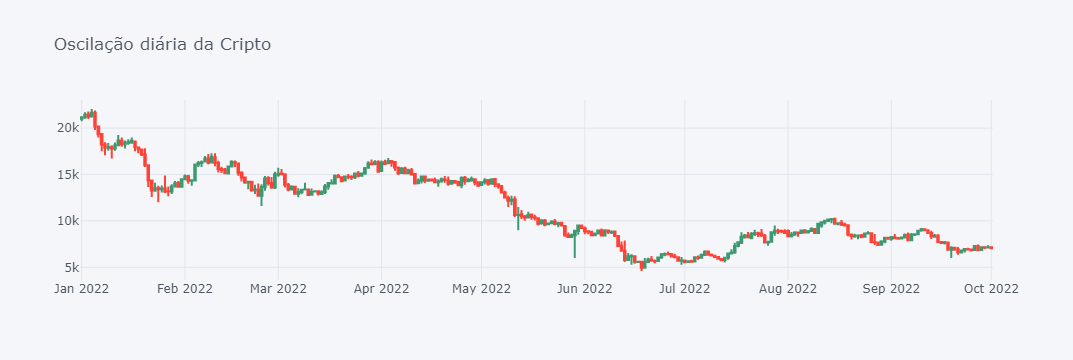

In [58]:
plot_candle (df_sumary_cripto)

<AxesSubplot:xlabel='date'>

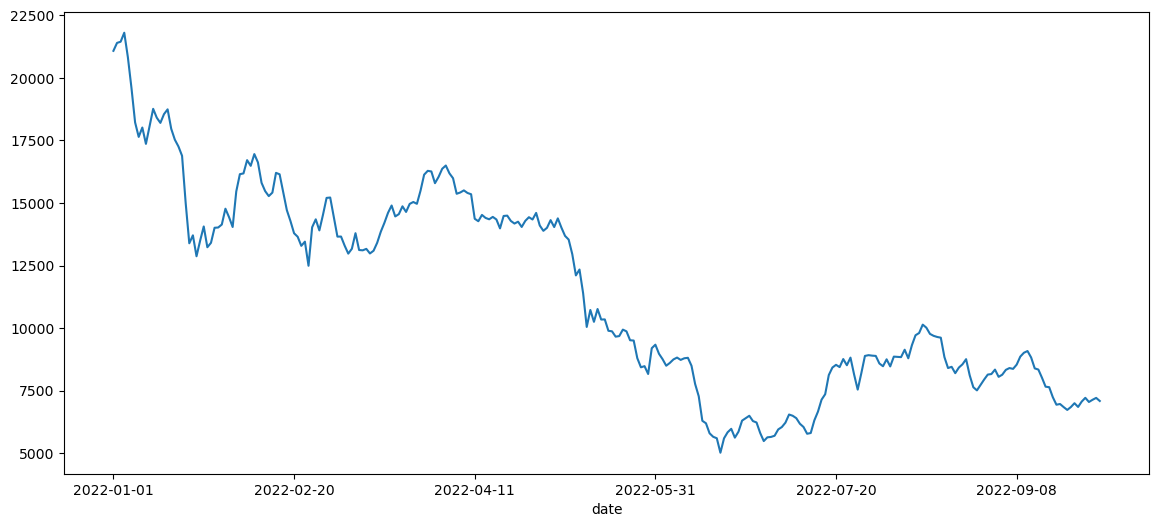

In [59]:
df_sumary_cripto['avg_price'].plot(figsize=(14,6))

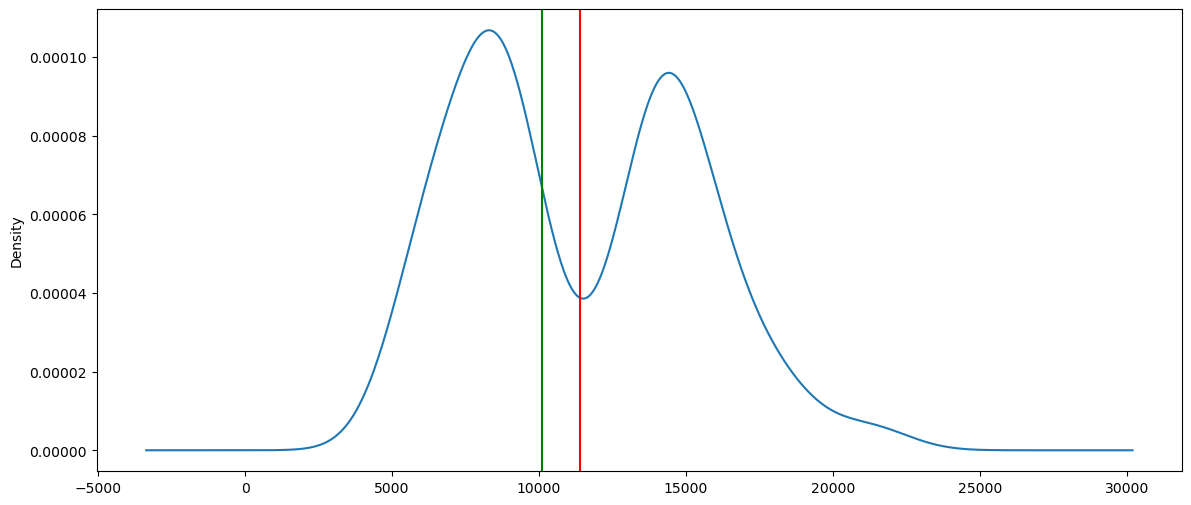

In [60]:
ax = df_sumary_cripto['avg_price'].plot(kind='density', figsize=(14,6))
ax.axvline(df_sumary_cripto['avg_price'].mean(), color='red')
ax.axvline(df_sumary_cripto['avg_price'].median(), color='green')

<AxesSubplot:>

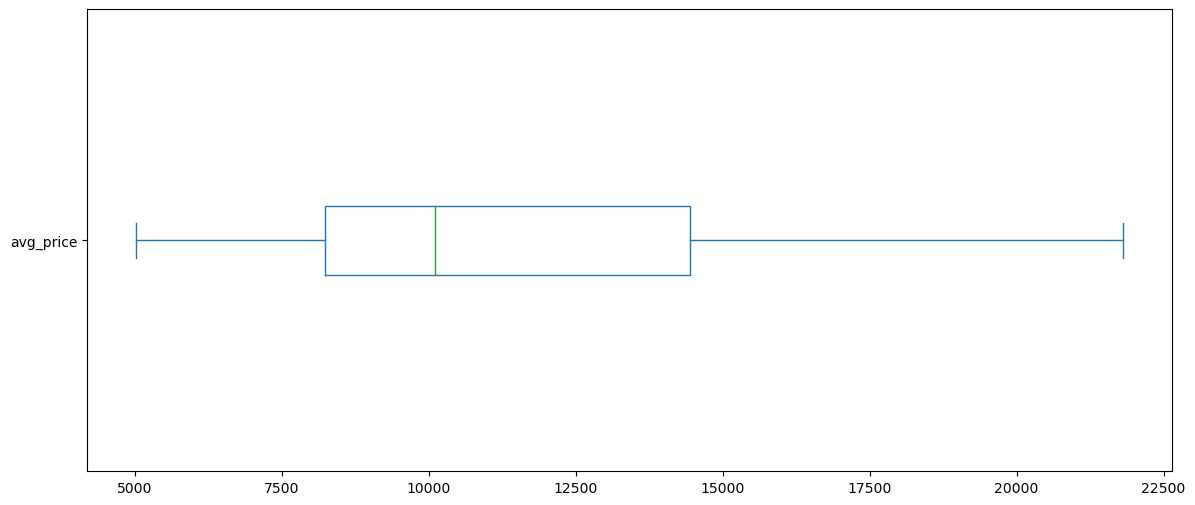

In [61]:
df_sumary_cripto['avg_price'].plot(kind='box', vert=False, figsize=(14,6))

In [91]:
df_sumary_cripto.describe()

,opening,closing,lowest,highest,amount,avg_price
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,11436.884100,11385.059897,11027.684812,11784.025482,3027.335766,11408.880563
std,3996.537162,3963.058282,3905.616859,4039.802427,1447.620947,3970.346592
min,4943.169810,4946.079750,4601.230000,5626.740000,844.000000,5021.829175
25%,8262.145375,8257.847586,7997.750000,8607.435000,2026.750000,8234.151573
50%,10327.910035,10251.024267,9876.603822,10479.559990,2785.500000,10095.233463
75%,14487.931605,14473.593825,14087.500007,14840.000000,3618.500000,14443.579434
max,21664.857680,21664.857680,21190.919200,22063.521290,9560.000000,21806.089037


In [92]:
df_sumary_cripto2 = pd.DataFrame()

In [93]:
df_sumary_cripto2['open'] = df_sumary_cripto[['opening']].copy()
df_sumary_cripto2['high'] = df_sumary_cripto['highest']
df_sumary_cripto2['low'] = df_sumary_cripto['lowest']
df_sumary_cripto2['close'] = df_sumary_cripto['closing']

In [94]:
df_sumary_cripto2

,open,high,low,close
date,,,,
2022-01-01,21019.97995,21290.000000,20737.07006,21166.597560
2022-01-02,21166.59756,21706.200000,21021.63000,21449.928000
2022-01-03,21457.64722,21800.000020,20992.85121,21245.449990
2022-01-04,21245.45000,22063.521290,21190.91920,21664.857680
2022-01-05,21664.85768,21892.799750,19800.00000,20175.940070
...,...,...,...,...
2022-09-27,7305.00000,7453.087470,6808.03580,6839.208560
2022-09-28,6872.48828,7259.280000,6785.20580,7163.151122
2022-09-29,7162.09157,7247.131395,6964.07159,7144.104563


In [63]:
def numOfDays(date1, date2):
    return (date2-date1).days
     
date1 = datetime.date(2018, 12, 13)
date2 = datetime.date(2019, 2, 25)
print(numOfDays(date1, date2))

74


In [64]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [95]:
qf = cf.QuantFig(df_sumary_cripto2, title = 'Oscilação do Preço da Cripto', legend = 'top', name = 'Cripto')

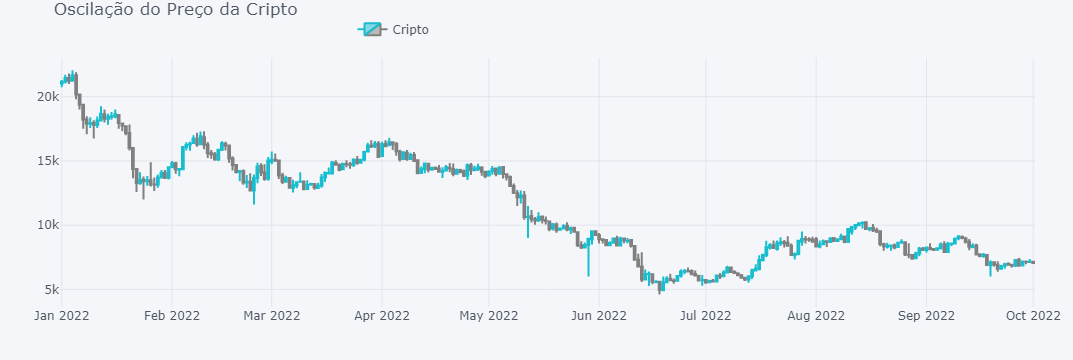

In [96]:
qf.iplot()

In [89]:
qf.add_bollinger_bands()

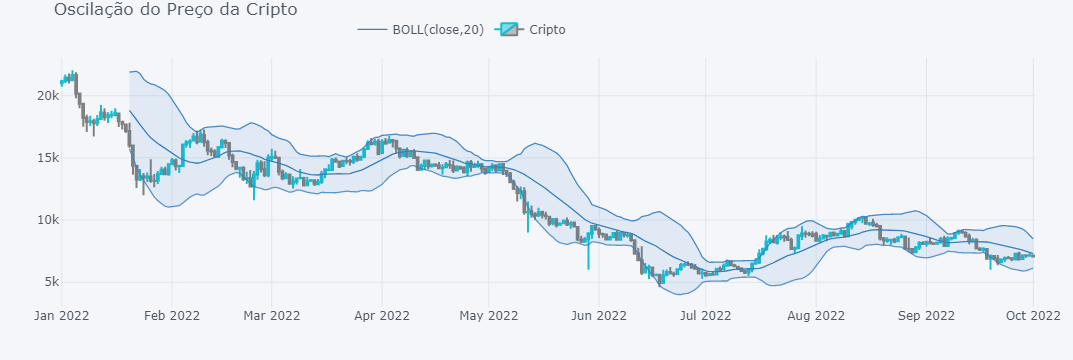

In [90]:
qf.iplot()